# <center>Email spam prediction

###### Verifying whether an email is spam or not, and striving to minimize Type 2 errors, which involve mistakenly classifying a legitimate email as spam. While people may be more forgiving of Type 1 errors, which entail failing to identify spam emails, they are less tolerant of Type 2 errors, where non-spam emails are incorrectly marked as spam.

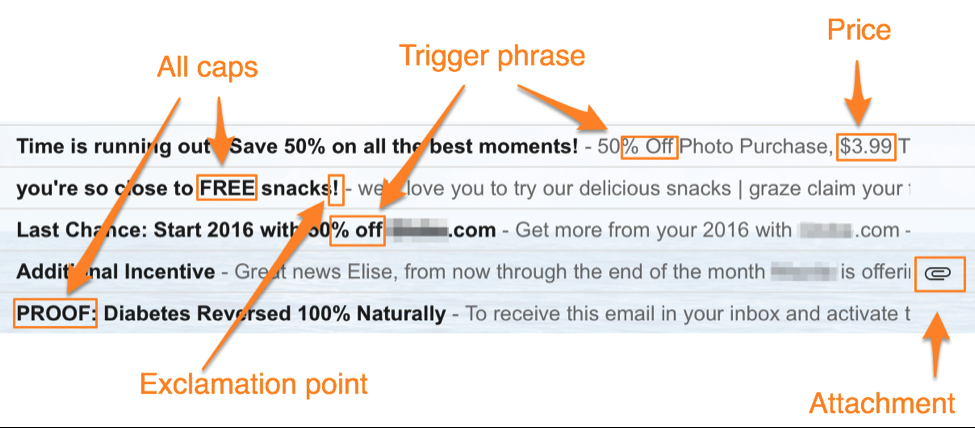

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.io import arff
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,RocCurveDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

### Loading the dataset

In [2]:
data = arff.loadarff('./dataset_44_spambase.arff')
df = pd.DataFrame(data[0])
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,b'1'
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,b'1'
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,b'1'
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,b'1'
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,b'1'


###### These columns appear to represent the frequencies of specific words in each email, which are likely used as features for spam classification.

1)word_freq_make: The frequency of the word "make" in the email.

2)word_freq_address: The frequency of the word "address" in the email.

3)word_freq_all: The frequency of the word "all" in the email.

4)word_freq_3d: The frequency of the word "3d" in the email.

5)word_freq_our: The frequency of the word "our" in the email.

6)word_freq_over: The frequency of the word "over" in the email.

7)word_freq_remove: The frequency of the word "remove" in the email.

8)word_freq_internet: The frequency of the word "internet" in the email.

9)word_freq_order: The frequency of the word "order" in the email.

10)word_freq_mail: The frequency of the word "mail" in the email.


###### These columns represent the frequencies of specific characters in each email. These character frequencies can also be used as features for spam classification.

11)char_freq_%3B: The frequency of the character ";" (semicolon) in the email.

12)char_freq_%28: The frequency of the character "(" (left parenthesis) in the email.

13)char_freq_%5B: The frequency of the character "[" (left square bracket) in the email.

14)char_freq_%21: The frequency of the character "!" (exclamation mark) in the email.

15)char_freq_%24: The frequency of the character "$" (dollar sign) in the email.

16)char_freq_%23: The frequency of the character "#" (hash/pound symbol) in the email.

###### These columns seem to capture characteristics related to capitalization in the email text.

17)capital_run_length_average: The average length of consecutive capital letters in the email.

18)capital_run_length_longest: The length of the longest consecutive sequence of capital letters in the email.

19)capital_run_length_total: The total number of capital letters in the email.




###### class: The target variable, where '1' typically indicates that the email is spam, and '0' indicates that it's not spam.

### Converting our target value to numeric

In [3]:
df['class'] = df['class'].astype(str)

In [4]:
df['class'] = df['class'].str.replace(r'\D','',regex = True)

In [5]:
df['class'] = df['class'].astype(int)

In [6]:
df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485.0,2259.0,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40.0,191.0,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40.0,191.0,1


### cleaning the data

In [7]:
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### Information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

### Checking and removing duplicates

In [9]:
df.duplicated().sum()

391

In [10]:
df.drop_duplicates(inplace=True)

### Shape of the dataset

In [11]:
df.shape

(4210, 58)

There are 4210 records are available here

### Columns of the dataset

In [12]:
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


### Spliting colums based on features and target

In [13]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

### Scaling the features

In [14]:
sc = StandardScaler()

In [15]:
x = sc.fit_transform(x)

### Checking the the target is balanced or not

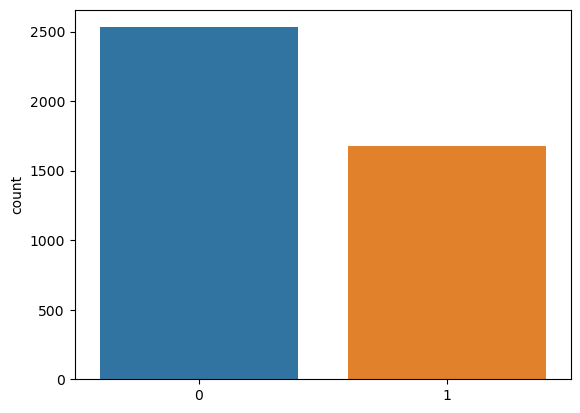

In [16]:
sns.countplot(x=y);

###### we have to equalize the count of both the values '0' and '1'. for this we will do oversampling

### Oversampling the target using SMOTE

In [17]:
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)

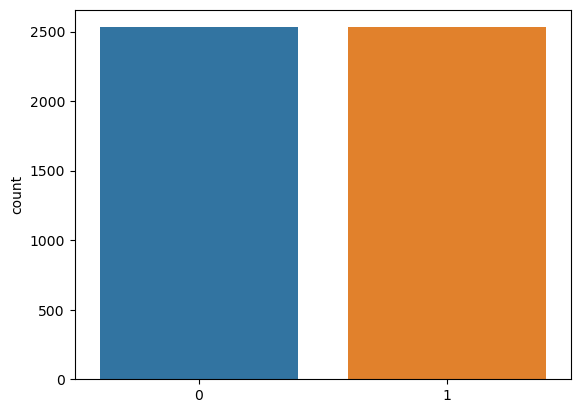

In [18]:
sns.countplot(x=y_smote);

###### Now the target is balanced

In [19]:
models = {'LogisticRegression': LogisticRegression(),
         'AdaBoostClassifier': AdaBoostClassifier(),
         'GradientBoostingClassifier': GradientBoostingClassifier(),
         'RandomForestClassifier':RandomForestClassifier(),
         'KNeighborsClassifier':KNeighborsClassifier(),
         'DecisionTreeClassifier':DecisionTreeClassifier()}

In [20]:
for name,model in models.items():
    cv_score = cross_val_score(model,x_smote,y_smote,scoring='accuracy',cv=10,n_jobs=-1)
    print ('Your cross validation model is:',name)
    print('Mean cross validaton score is:',np.mean(cv_score)*100)
    print('*'*100)

Your cross validation model is: LogisticRegression
Mean cross validaton score is: 92.29486789687459
****************************************************************************************************
Your cross validation model is: AdaBoostClassifier
Mean cross validaton score is: 92.37419214007843
****************************************************************************************************
Your cross validation model is: GradientBoostingClassifier
Mean cross validaton score is: 94.15230254695138
****************************************************************************************************
Your cross validation model is: RandomForestClassifier
Mean cross validaton score is: 94.54779334377996
****************************************************************************************************
Your cross validation model is: KNeighborsClassifier
Mean cross validaton score is: 90.99204028969916
**********************************************************************************

We can choose Random forest classifier since it has higher accuracy

### spliting to training and testing data

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=56,shuffle=True)

In [22]:
model = RandomForestClassifier(random_state=51)

### fitting the training data to the classification model

In [23]:
model.fit(x_train,y_train)
print('Model trained with RandomForestClassifier')
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
train_accuracy = accuracy_score(y_train,y_pred_train)*100
test_accuracy = accuracy_score(y_test,y_pred_test)*100
print('Training accuracy is : ',train_accuracy)
print('Testing accuracy : ', test_accuracy)

Model trained with RandomForestClassifier
Training accuracy is :  99.95060508767597
Testing accuracy :  93.18854886475815


### Confusion matrix

In [24]:
confusion_matrix_train = confusion_matrix(y_train,y_pred_train)
confusion_matrix_test = confusion_matrix(y_test,y_pred_test)
print('confusion_matrix of training data is : ',confusion_matrix_train)
print('confusion_matrix of test data is : ',confusion_matrix_test)

confusion_matrix of training data is :  [[2034    2]
 [   0 2013]]
confusion_matrix of test data is :  [[470  25]
 [ 44 474]]


### wrong prediction

In [25]:
print('Wrong prediction made is : ',(y_test!=y_pred_test).sum(),'/',len(y_test))

Wrong prediction made is :  69 / 1013


### ROC Curve

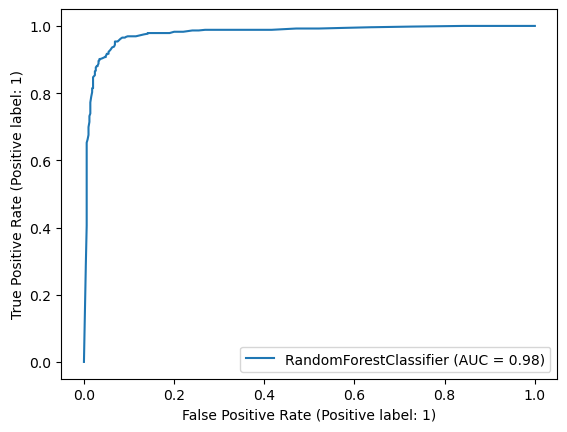

In [26]:
Roc_curve = RocCurveDisplay.from_estimator(model,x_test,y_test)

### Trying to reduce the count of prediction as the email is spam when the email is not actually spam. (we can accept wrong prediction as genuine even if it is actually spam)

In [27]:
def classify_with_threshold(model, x, threshold):
    probabilities = model.predict_proba(x)[:, 1]  # Get the predicted probabilities for the positive class
    return (probabilities >= threshold).astype(int)

In [28]:
new_threshold = 0.8
y_pred_adjusted_train = classify_with_threshold(model, x_train, new_threshold)


In [29]:
new_threshold = 0.8
y_pred_adjusted_test = classify_with_threshold(model, x_test, new_threshold)


In [30]:
confusion_matrix_train_adjusted = confusion_matrix(y_train,y_pred_adjusted_train)
confusion_matrix_test_adjusted = confusion_matrix(y_test,y_pred_adjusted_test)
print('confusion_matrix of training data is : ',confusion_matrix_train_adjusted)
print('confusion_matrix of test data is : ',confusion_matrix_test_adjusted)

confusion_matrix of training data is :  [[2036    0]
 [  70 1943]]
confusion_matrix of test data is :  [[485  10]
 [ 93 425]]


In [31]:
print('Wrong prediction made is : ',(y_test!=y_pred_adjusted_test).sum(),'/',len(y_test))

Wrong prediction made is :  103 / 1013


now we could reduce the probability for choosing an email as spam when it is not actually spam

### Checking the distribution of the probabilities of each values of x

In [32]:
probability = model.predict_proba(x)[:, 1]

In [33]:
probability_x = pd.Series(probability)

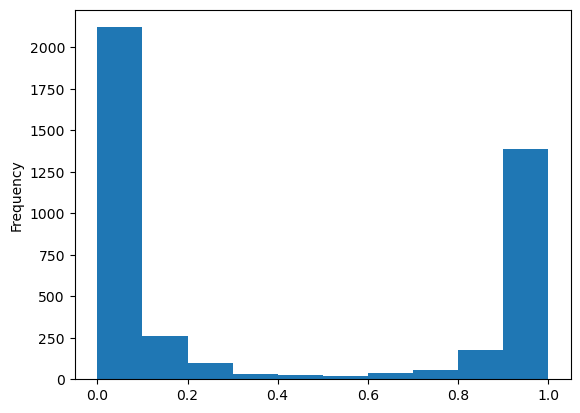

In [34]:
probability_x.plot.hist();

### Training accuracy after reducing the false prediction as email is spam

In [35]:
fpr = confusion_matrix_train_adjusted[0][1]

In [36]:
(len(y_train) - fpr)*100/len(y_train)

100.0

#### Accuracy before reducing type 2 error (checking accuracy by not considering type 1 error as error)

In [37]:
fpr_1 = confusion_matrix_train[0][1]

In [38]:
(len(y_train) - fpr_1)*100/len(y_train)

99.95060508767597

### Testing accuracy after reducing the false prediction as email is spam(avoiding wrong prediction as not spam)

In [39]:
fpr1 = confusion_matrix_test_adjusted[0][1]

In [40]:
(len(y_test) - fpr1)*100/len(y_test)

99.01283316880553

##### Accuracy before reducing type 2 error  (checking accuracy by not considering type 1 error as error)

In [41]:
fpr1_1 = confusion_matrix_test[0][1]

In [42]:
(len(y_test) - fpr1_1)*100/len(y_test)

97.53208292201381

### Checking accuracy by considering both fpr(false positive) and fnr(false negative) as errors

#### Actual training accuracy after reducing the false prediction as email is spam

In [43]:
train_accuracy = accuracy_score(y_train,y_pred_adjusted_train)*100
print('Adjusted training accuracy is : ',train_accuracy)

Adjusted training accuracy is :  98.27117806865893


#### Actual testing accuracy after reducing the false prediction as email is spam

In [44]:
test_accuracy = accuracy_score(y_test,y_pred_adjusted_test)*100
print('Adjusted testing accuracy : ', test_accuracy)

Adjusted testing accuracy :  89.83218163869694
